In [1]:
import functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("data/original_data.csv")
df.head(50)

,id,movie_name,synopsis,genre
0,44978,Super Me,A young scriptwriter starts bringing valuable ...,fantasy
1,50185,Entity Project,A director and her friends renting a haunted h...,horror
2,34131,Behavioral Family Therapy for Serious Psychiat...,This is an educational video for families and ...,family
3,78522,Blood Glacier,Scientists working in the Austrian Alps discov...,scifi
4,2206,Apat na anino,Buy Day - Four Men Widely - Apart in Life - By...,action
5,46636,Le démon dans l'île,"On an island, things start going crazy as the ...",horror
6,53777,Candid,A video voyeur stalks women in the city with a...,horror
7,24872,Hired,Twin brothers separated at birth and worlds ap...,crime
8,17224,Miruthan,A traffic police officer teams up with his fri...,adventure
9,54900,Until You See Me,A legendary tale unravels.,mystery


In [23]:
# these mappings derives from the confusion matrix we have previuosly built
to_merge = {'adventure':'action', 'family': 'fantasy'}
df = functions.merge_genres(df, to_merge=to_merge, inplace=True)
df.head(50)

,id,movie_name,synopsis,genre
0,44978,Super Me,A young scriptwriter starts bringing valuable ...,fantasy
1,50185,Entity Project,A director and her friends renting a haunted h...,horror
2,34131,Behavioral Family Therapy for Serious Psychiat...,This is an educational video for families and ...,fantasy
3,78522,Blood Glacier,Scientists working in the Austrian Alps discov...,scifi
4,2206,Apat na anino,Buy Day - Four Men Widely - Apart in Life - By...,action
5,46636,Le démon dans l'île,"On an island, things start going crazy as the ...",horror
6,53777,Candid,A video voyeur stalks women in the city with a...,horror
7,24872,Hired,Twin brothers separated at birth and worlds ap...,crime
8,17224,Miruthan,A traffic police officer teams up with his fri...,action
9,54900,Until You See Me,A legendary tale unravels.,mystery


In [24]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=0, stratify=df['genre'])
df_train

,id,movie_name,synopsis,genre
45742,27689,Carrossel 2: O Sumiço de Maria Joaquina,The children are invited by a Brazilian music ...,fantasy
2664,11578,Kismet,A roguish poet is given the run of the schemin...,action
34635,84466,Yakada Pihatu,One person win the the life with brave and own...,thriller
42694,80670,Everything Beautiful Is Far Away,"A guy, a girl, and a robothead hike across a d...",scifi
51259,23362,Domatio 69,"For fear of her child's life, a statuesque fli...",crime
...,...,...,...,...
49334,66374,Across to Singapore,Conflict ensues when a young man's childhood s...,romance
10965,12684,Ais Kosong,This adventurous Tamil comedy is directed by M...,action
17174,51566,Neighbor,A mysterious new girl arrives in posh suburban...,horror
15757,35505,La Espera Desespera,A robbery for love.,fantasy


### Check:

In [25]:
#all the preprocessing for the training
df_train, x_train = functions.preprocessing(df=df_train, remove_useless_sentences = True, is_train = True, tokenize=True, remove_one_characters=True, lemmatize=True, remove_stop_words=True)
y_train = functions.target_variable(df_train, 'genre')
print(y_train)
print(x_train[1])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


[2 0 7 ... 3 2 0]
['roguish', 'poet', 'given', 'run', 'scheming', 'wazir', 'harem', 'pretending', 'help', 'usurp', 'young', 'caliph']


In [26]:
from gensim.corpora import Dictionary

## Remove rare and common tokens.
# Create a dictionary representation of the documents.
dictionary = Dictionary(x_train)

print("Dictionary lenght 1):", len(dictionary))

# Filter out words that occur less than 5 documents, or more than 40% of the documents.
dictionary.filter_extremes(no_below=5, no_above=0.4)
print("Dictionary lenght 2):",len(dictionary))

Dictionary lenght 1): 37040
Dictionary lenght 2): 10531


In [27]:
# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in x_train]

In [28]:
df_train['BoW'] = corpus
df_train.head()

,id,movie_name,synopsis,genre,BoW
0,27689,Carrossel 2: O Sumiço de Maria Joaquina,The children are invited by a Brazilian music ...,fantasy,"[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1..."
1,11578,Kismet,A roguish poet is given the run of the schemin...,action,"[(14, 1), (15, 1), (16, 1), (17, 1), (18, 1), ..."
2,84466,Yakada Pihatu,One person win the the life with brave and own...,thriller,"[(24, 1), (25, 1), (26, 1), (27, 1), (28, 2), ..."
3,80670,Everything Beautiful Is Far Away,"A guy, a girl, and a robothead hike across a d...",scifi,"[(35, 1), (36, 1), (37, 1), (38, 1), (39, 1), ..."
4,23362,Domatio 69,"For fear of her child's life, a statuesque fli...",crime,"[(1, 1), (29, 1), (43, 1), (44, 1), (45, 1), (..."


In [29]:
# I'm using the bag of owrds representation since we can adjust no_below and no_above for the tokens
lexicon_new = functions.create_lexicon(df_train, genre_col='genre', clean_synopsis_col='BoW')

  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:00<00:00, 76.46it/s]


In [30]:
genres = np.unique(df_train['genre'])

In [31]:
# Get the set of words for the first genre
common_words = set(lexicon_new[genres[0]])

# Iterate over the remaining genres and find the intersection with the common_words set
for genre in genres[1:]:
    common_words = common_words.intersection(set(lexicon_new[genre]))

# Get the count of common words
num_common_words = len(common_words)

print("Number of words present in all genres:", num_common_words, '\n--------')
for key, idxinfo in zip([dictionary[w[0]] for w in common_words], common_words):
    print (key, idxinfo)

Number of words present in all genres: 3085 
--------
erupts (824, 1)
discover (958, 1)
sexual (562, 1)
word (4427, 1)
reveal (3036, 1)
terminally (4081, 1)
car (388, 1)
game (429, 2)
fed (2428, 1)
lifetime (2032, 1)
recruited (1037, 1)
mafia (1171, 1)
breaking (5551, 1)
parallel (3249, 1)
landscape (4893, 1)
formed (5027, 1)
secret (904, 2)
hanging (9145, 1)
poisoned (2641, 1)
stay (3374, 1)
brand (7754, 1)
group (380, 2)
francisco (1250, 1)
told (1983, 1)
stage (988, 1)
non (592, 1)
filming (6497, 1)
kill (330, 1)
disillusioned (7146, 1)
befriend (1375, 1)
patient (3849, 1)
house (459, 2)
stricken (2458, 1)
color (3191, 1)
appalachian (6972, 1)
garden (1934, 1)
stone (805, 1)
client (2845, 1)
like (543, 1)
goddess (1454, 1)
soft (3800, 1)
separated (2671, 1)
evade (3404, 1)
talk (4315, 1)
shop (2013, 1)
burning (4449, 1)
mr (1018, 1)
million (622, 1)
contend (5532, 1)
jack (1667, 1)
wandering (1801, 1)
11 (1405, 1)
reporter (148, 1)
term (3617, 1)
pal (5657, 1)
electric (4528, 1)
alc

In [32]:
num_words = len(lexicon_new)
word_counts = np.zeros((num_words, num_words))

# function to compute the common words count matrix
def word_count(lexicon_new, diagonal=True):
    for i in range(num_words):
        genre1 = genres[i]
        words1 = set(lexicon_new[genre1])
        if diagonal == True:
            word_counts[i, i] = num_common_words   # I set the diagonal to this value to make things more readable

        for j in range(i+1, num_words):
            genre2 = genres[j]
            words2 = set(lexicon_new[genre2])

            common_words = words1.intersection(words2)
            word_counts[i, j] = len(common_words) - num_common_words   # removing the common words since are useless
            word_counts[j, i] = len(common_words) - num_common_words

    return word_counts

In [33]:
word_counts = word_count(lexicon_new)
word_counts

array([[3085., 3681., 5596., 3439., 3755., 3810., 3756., 3792.],
       [3681., 3085., 3453., 2305., 2708., 2593., 2282., 2741.],
       [5596., 3453., 3085., 3542., 3747., 3858., 3722., 3637.],
       [3439., 2305., 3542., 3085., 2666., 2363., 2556., 2626.],
       [3755., 2708., 3747., 2666., 3085., 2709., 2606., 2896.],
       [3810., 2593., 3858., 2363., 2709., 3085., 2364., 2662.],
       [3756., 2282., 3722., 2556., 2606., 2364., 3085., 2604.],
       [3792., 2741., 3637., 2626., 2896., 2662., 2604., 3085.]])

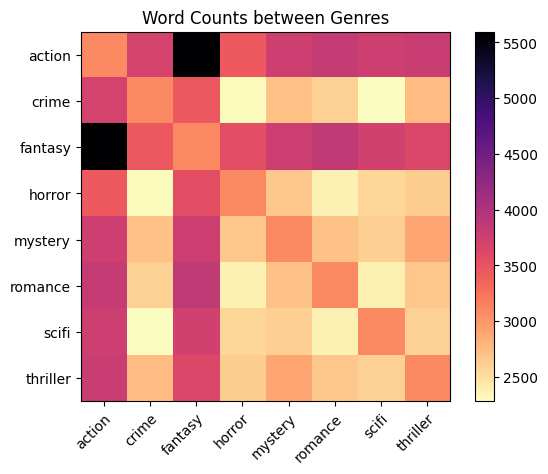

In [34]:
fig, ax = plt.subplots()
heatmap = ax.imshow(word_counts, cmap='magma_r')

# Set the genre names as tick labels
ax.set_xticks(np.arange(num_words))
ax.set_yticks(np.arange(num_words))
ax.set_xticklabels(genres)
ax.set_yticklabels(genres)

# Rotate the tick labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Add colorbar
cbar = plt.colorbar(heatmap)

# Set the title and display the plot
plt.title("Word Counts between Genres")
plt.show()

## Data preparation and padding

In [35]:
#all the possible preprocessing for the training
df_test, x_test = functions.preprocessing(df=df_test, remove_useless_sentences = True, tokenize=True, remove_one_characters=True, lemmatize=True, remove_stop_words=True)
y_test = functions.target_variable(df_test, 'genre')
x_test[1]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['bankrupt',
 'publisher',
 'think',
 'trouble',
 'stumble',
 'brown',
 'wallet',
 'containing',
 '200',
 'pound',
 'implicated',
 'murder',
 'wealthy',
 'aunt']

In [36]:
#prints for the choice of the padding size
list_lengths = [len(sublist) for sublist in x_train]

#average length
average_length = sum(list_lengths) / len(list_lengths)

print("Average Length of Lists in x_train:", average_length)

#maximum length
max_length = max(list_lengths)

print("Maximum Length of Lists in x_train:", max_length)

#longer than 30
count_longer_than_30 = sum(1 for sublist in x_train if len(sublist) > 30)

print("Number of lists longer than 30 in x_train:", count_longer_than_30)

Average Length of Lists in x_train: 14.147641322814122
Maximum Length of Lists in x_train: 43
Number of lists longer than 30 in x_train: 59


In [37]:
#function called with only the training
padded_train, tokenizer = functions.tokenizer_padding(x_train, max_length=40)
print(padded_train, len(tokenizer.word_index)) #len(tokenizer.word_index) is the vocab_size


[[   40  1564  2700 ...     0     0     0]
 [10813  1668   586 ...     0     0     0]
 [  313   308     2 ...     0     0     0]
 ...
 [   21    14    12 ...     0     0     0]
 [  443     7     0 ...     0     0     0]
 [  108  2158   227 ...     0     0     0]] 37036


In [38]:
#function called with training and test
padded_train, padded_test, tokenizer = functions.tokenizer_padding(x_train=x_train, max_length=40, x_test=x_test)
print(padded_train, "\n\n", padded_test, len(tokenizer.word_index))

[[   40  1564  2700 ...     0     0     0]
 [10813  1668   586 ...     0     0     0]
 [  313   308     2 ...     0     0     0]
 ...
 [   21    14    12 ...     0     0     0]
 [  443     7     0 ...     0     0     0]
 [  108  2158   227 ...     0     0     0]] 

 [[10626  3395    79 ...     0     0     0]
 [ 4295  3077   454 ...     0     0     0]
 [   99     5  3757 ...     0     0     0]
 ...
 [ 2595  1524    85 ...     0     0     0]
 [ 1076    90    93 ...     0     0     0]
 [  274   208   398 ...     0     0     0]] 37036


In [39]:
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)
print(padded_train.shape)
print(padded_test.shape)

y_train: (42969,)
y_test: (10800,)
(42969, 40)
(10800, 40)


## Models

In [40]:
from gensim.models import Word2Vec
word_2_vec_learner = Word2Vec(sentences = x_train, vector_size = 100, window = 5, min_count = 1, workers = 4, sg =1)

In [41]:
#words close to crime
criminal = word_2_vec_learner.wv.most_similar("criminal")
criminal

[('mastermind', 0.8241312503814697),
 ('smuggler', 0.8183053135871887),
 ('hitman', 0.812484085559845),
 ('bust', 0.8112689256668091),
 ('mobster', 0.8107513785362244),
 ('kingpin', 0.8025062680244446),
 ('counterfeiter', 0.799270510673523),
 ('heroin', 0.7992115616798401),
 ('infiltrate', 0.7988857626914978),
 ('goon', 0.7988036870956421)]

In [42]:
word_index = tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, 100))  # 100 is the vector_size in Word2Vec

for word, i in word_index.items():
    if word in word_2_vec_learner.wv:
        embedding_matrix[i] = word_2_vec_learner.wv[word]

In [43]:
len(word_index)

37036

In [44]:
embedding_matrix.shape

(37037, 100)

## CNN

In [45]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Dropout
from keras.regularizers import l2, l1
from keras.callbacks import EarlyStopping, ModelCheckpoint

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D

In [46]:
import random
import itertools

In [47]:
genres = np.unique(df['genre'])
genres

array(['action', 'crime', 'fantasy', 'horror', 'mystery', 'romance',
       'scifi', 'thriller'], dtype=object)

In [49]:
# set parameters:
# embedding_dims = 32 # Length of the token vectors
filters = 64 # dimensionality of the output space
hyperparameters = {
    'embedding_dim': [60, 50, 40],
    'learning_rate': [0.005, 0.001],
    'batch_size' : [32],
    'dropout' : [0.3, 0.4, 0.5],
    'recurrent_dropout' : [0.5],
    'kr' : [0.01, 0.005, 0.001],  # Kernel regularizer
    'kernel_size' : [3, 5],  # height and width of the convolution window
    'filters' : [64, 32],
    'layer_size' : [32, 64, 128]   # hidden layers
}

number_of_combinations = 10    # IMPORTANT

random_combinations = random.sample(list(itertools.product(*hyperparameters.values())), number_of_combinations) 


def build_model_cnn_w2v(param_dict):
    #embedding and CNN
    model = Sequential()
    model.add(Embedding(input_dim=len(word_index) + 1, output_dim=100,  #100 is the vector_size
                        weights=[embedding_matrix],  #set pre-trained weights
                        input_length=padded_train.shape[1], trainable=False))

    model.add(Dropout(0.3))
    # We add a Convolution1D, which will learn word group filters of size filter_length:
    # This layer creates a convolution kernel that is convolved with the layer input
    # over a single spatial (or temporal) dimension to produce a tensor of outputs
    model.add(Conv1D(param_dict['filters'],
                    param_dict['kernel_size'],
                    padding='valid',
                    activation='relu',
                    strides=1))
    # We use max pooling:
    model.add(GlobalMaxPooling1D())
    # We add a vanilla hidden layer:
    model.add(Dense(param_dict['layer_size']*2, activation='relu', kernel_regularizer=l2(param_dict['kr'])))
    model.add(Dropout(param_dict['dropout']))
    # We add the second vanilla hidden layer:
    model.add(Dense(param_dict['layer_size'], activation='relu', kernel_regularizer=l2(param_dict['kr'])))
    model.add(Dropout(param_dict['dropout']))
    model.add(Activation('relu'))

    # IMPORTANT!
    model.add(Dense(len(genres)))
    model.add(Activation('softmax'))

    optimizer = Adam(learning_rate=param_dict['learning_rate'])
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

In [48]:
# Plot training and validation accuracy
def plot_history(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

## Evaluation

In [46]:
print('Best model is:', best_params, '\nValidation accuracy:', best_accuracy)

Best model is: {'embedding_dim': 40, 'learning_rate': 0.001, 'batch_size': 32, 'dropout': 0.4, 'recurrent_dropout': 0.5, 'kr': 0.001, 'kernel_size': 3, 'filters': 64, 'layer_size': 128} 
Validation accuracy: 0.4276951253414154


Testing with hyperparameters: {'learning_rate': 0.001, 'batch_size': 32, 'dropout': 0.3, 'kr': 0.005, 'kernel_size': 3, 'filters': 32, 'layer_size': 128}
Result combo 0: 0.4124823808670044


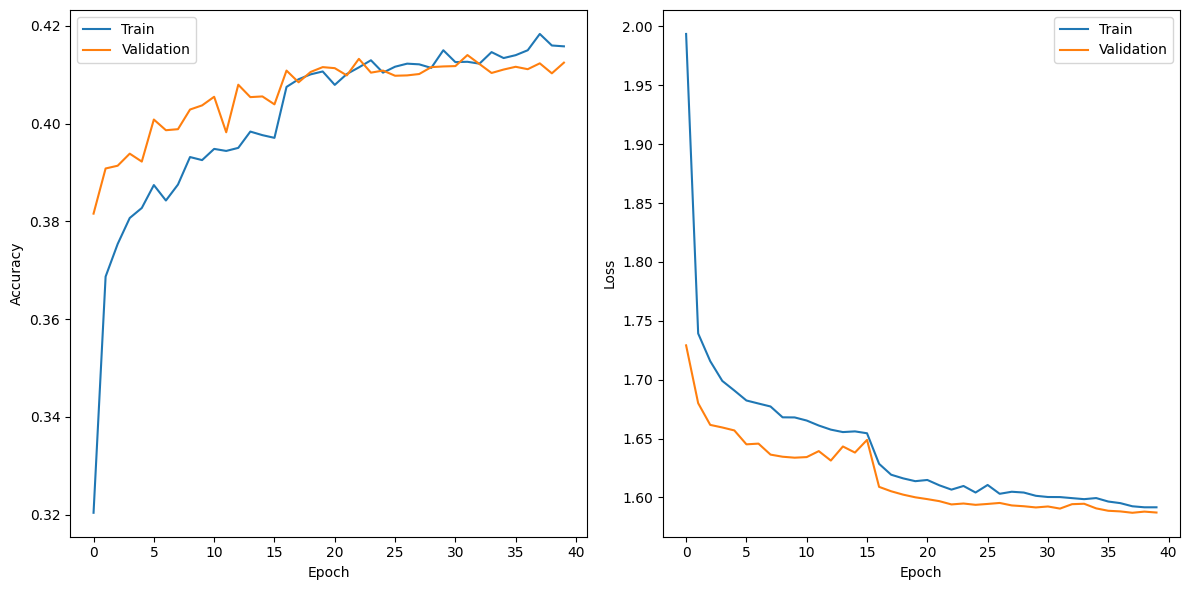

In [58]:
hyperparameters = {
    'learning_rate': [0.001],
    'batch_size' : [32],
    'dropout' : [0.3],
    'kr' : [0.005],  # Kernel regularizer
    'kernel_size' : [3],  # height and width of the convolution window
    'filters' : [32],
    'layer_size' : [128]   # hidden layers
}

number_of_combinations = 1    # I just need one model
number_of_epochs = 40
random_combinations = random.sample(list(itertools.product(*hyperparameters.values())), number_of_combinations) 

for idx, combo in enumerate(random_combinations):
    param_dict = dict(zip(hyperparameters.keys(), combo))
    print("Testing with hyperparameters:", param_dict)

    model_cnn_w2v = build_model_cnn_w2v(param_dict)

    #eraly stopping and decreasing lr
    early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                patience=3, min_lr=0.000001)

    history = model_cnn_w2v.fit(padded_train, y_train, validation_split=0.33, epochs=number_of_epochs, batch_size=param_dict['batch_size'], verbose=0, callbacks=[early_stopping, reduce_lr], workers = 6)

    print('Result combo {}:'.format(idx), history.history['val_accuracy'][-1])

    plot_history(history)

In [59]:
#insert the best model
predictions = model_cnn_w2v.predict(padded_test)

338/338 [==============================] - 1s 3ms/step


In [60]:
predictions

array([[0.43741125, 0.01926397, 0.30929452, ..., 0.02110037, 0.06460749,
        0.04112243],
       [0.0784999 , 0.3403828 , 0.0332527 , ..., 0.04799991, 0.01001113,
        0.16483785],
       [0.06742526, 0.01900913, 0.13897292, ..., 0.03906262, 0.3016264 ,
        0.11656398],
       ...,
       [0.25464624, 0.39836225, 0.03548726, ..., 0.04468919, 0.01506811,
        0.15651624],
       [0.2520174 , 0.00367618, 0.67232466, ..., 0.02184796, 0.02369954,
        0.00600882],
       [0.05507671, 0.07473326, 0.11790445, ..., 0.60538405, 0.00747814,
        0.06892934]], dtype=float32)

In [61]:
predicted_labels = np.argmax(predictions, axis=1)

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.41      0.38      0.40      2160
           1       0.35      0.45      0.39      1080
           2       0.46      0.53      0.50      2160
           3       0.39      0.47      0.43      1080
           4       0.31      0.26      0.29      1080
           5       0.48      0.55      0.51      1080
           6       0.41      0.51      0.45      1080
           7       0.15      0.02      0.03      1080

    accuracy                           0.41     10800
   macro avg       0.37      0.40      0.37     10800
weighted avg       0.38      0.41      0.39     10800



In [63]:
genre_mapping = {}
for i, genre in enumerate(genres):
    genre_mapping[i] = genre

genre_mapping

{0: 'action',
 1: 'crime',
 2: 'fantasy',
 3: 'horror',
 4: 'mystery',
 5: 'romance',
 6: 'scifi',
 7: 'thriller'}

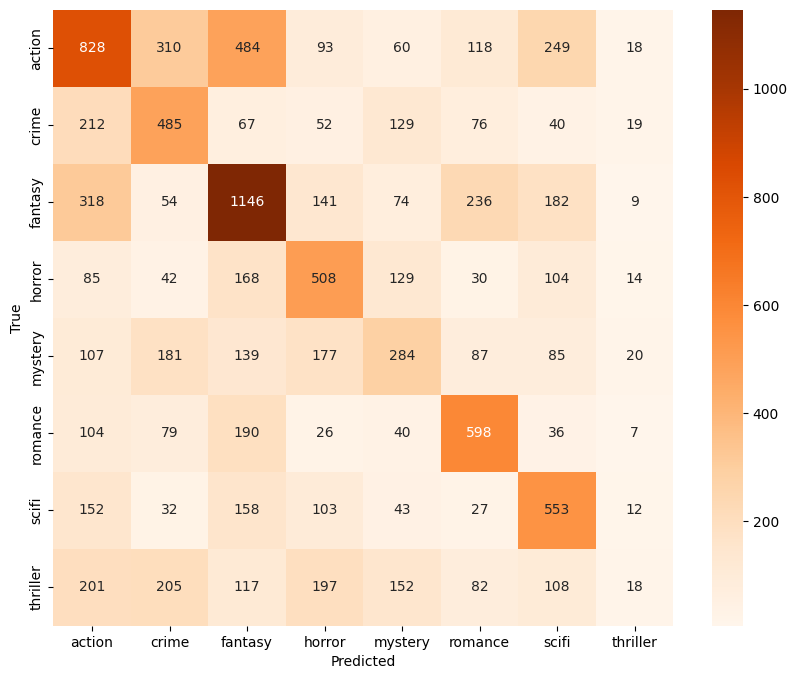

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf = confusion_matrix(y_true=y_test,y_pred=predicted_labels)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cf, annot=True, cmap="Oranges", fmt='g')  # fmt='g' suppresses scientific notation

# Map the numerical values to genres using the dictionary
ax.set_xticklabels([genre_mapping.get(int(label.get_text()), "") for label in ax.get_xticklabels()])
ax.set_yticklabels([genre_mapping.get(int(label.get_text()), "") for label in ax.get_yticklabels()])

plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Test set

In [66]:
test_loss_w2v, test_acc_w2v = model_cnn_w2v.evaluate(padded_test, y_test)
print('Test Loss %f, Test Accuracy %f' % (test_loss_w2v, test_acc_w2v))

338/338 [==============================] - 2s 5ms/step - loss: 1.6000 - accuracy: 0.4093
Test Loss 1.600008, Test Accuracy 0.409259
